In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import h5py
import os
np.random.seed(73)
from PIL import Image
import skimage
import glymur
from skimage.measure import compare_ssim,compare_psnr

In [2]:
#fname='/Users/xy-work/testfolder/test_DM_big_frame/Frame_19_7/DM_orig.h5'
fname='./DM_orig.h5'
f_i=h5py.File(fname,'r')
image_orig=f_i['data'][:]
print("image_orig shape: " + str(image_orig.shape))

image_orig shape: (2048, 3840, 3)


In [3]:
print("image_orig shape= " + str(image_orig.shape) + " , max= " + str(np.max(image_orig)) 
      + " , min= " + str(np.min(image_orig)) + " , mean= " + str(np.mean(image_orig)))

image_orig shape= (2048, 3840, 3) , max= 0.8980392156862745 , min= 0.050980392156862744 , mean= 0.36547271861489883


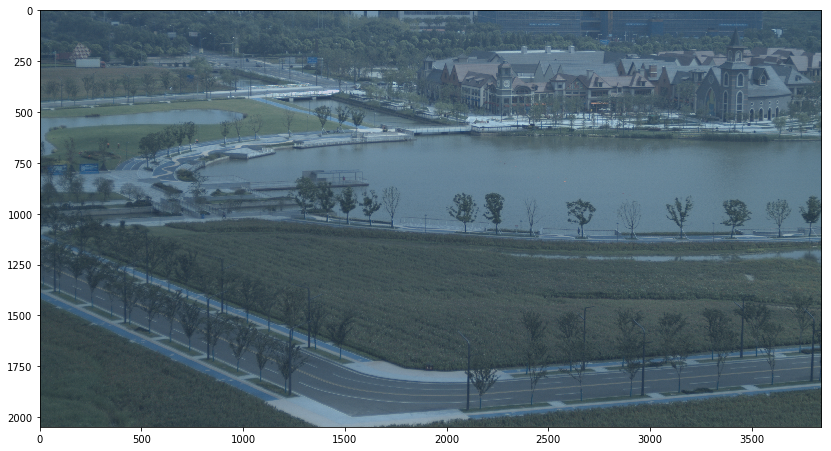

In [4]:
plt.figure(figsize=(14, 18))
plt.imshow(image_orig)

In [5]:
def trans_JP2k(data, comp_r):
    tmp=data*255.
    tmpu8=tmp.astype(np.uint8)
    jp2 = glymur.Jp2k('./test_jp_file.jp2', data=tmpu8, cratios=[comp_r,comp_r-0.0001,comp_r-0.00011])
    size=os.path.getsize("./test_jp_file.jp2")
    #jp2.layer = 0
    rd=jp2[:]
    rdf32=rd.astype(np.float32)
    rdf32=rdf32/255.
    return rdf32, size

In [6]:
def save_figure_dpi(image_t, oname, dpi_in, W, H):
    ii=(image_t*255).astype('uint8')
    im_ii=Image.fromarray(ii)
    fig = plt.figure(frameon=False)
    fig.set_size_inches(W,H)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    ax.imshow(im_ii)
    print("Writing: " + oname)
    fig.savefig(oname, dpi=dpi_in)

In [7]:
xjp,size=trans_JP2k(image_orig,48)

In [8]:
print("xjp shape= " + str(xjp.shape) + " , max= " + str(np.max(xjp)) 
      + " , min= " + str(np.min(xjp)) + " , mean= " + str(np.mean(xjp)))
print("size= " + str(size))
print("ratio= " + str(2048*3840*3/size))

xjp shape= (2048, 3840, 3) , max= 0.93333334 , min= 0.09019608 , mean= 0.36720985
size= 491497
ratio= 48.002246198857776


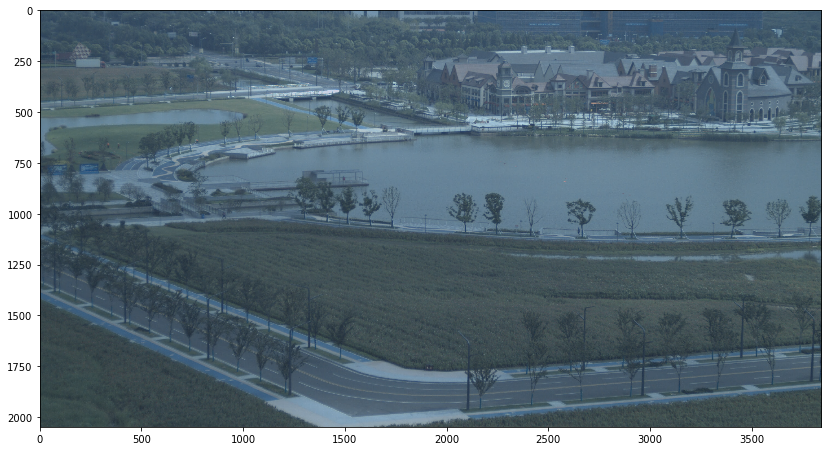

In [9]:
plt.figure(figsize=(14, 18))
plt.imshow(xjp)

Writing: ./4_JP2K_orig_48.png


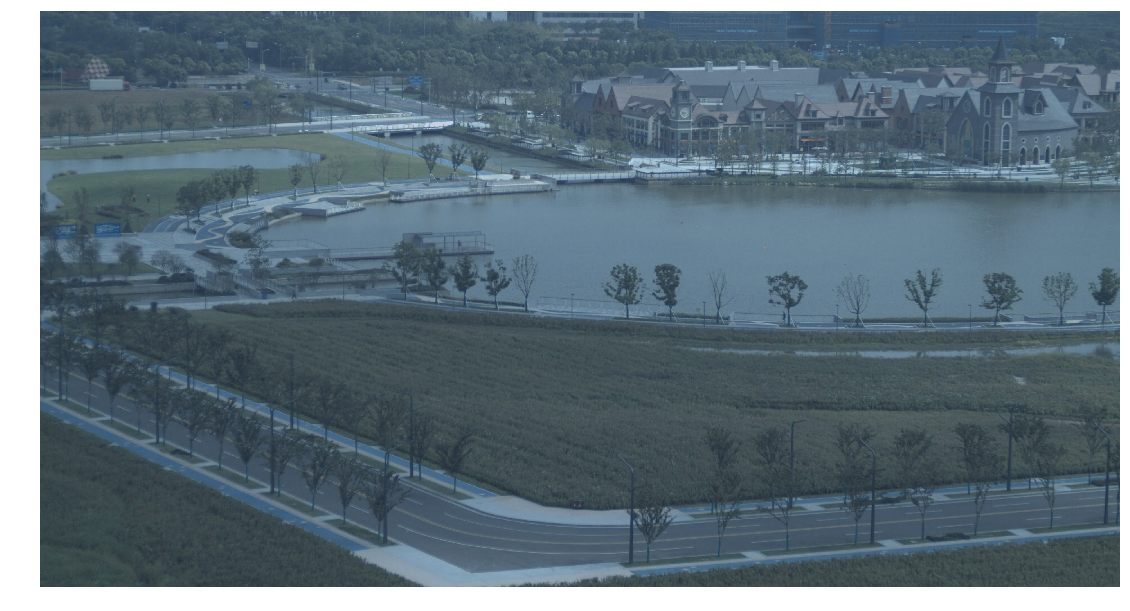

In [10]:
Dpi = 64
Wid = 15; Hig = 8
pre_o = "./4_"

oname= pre_o + 'JP2K_orig_48.png'
save_figure_dpi(xjp, oname, Dpi, Wid, Hig)

In [11]:
output=(xjp*255).astype('uint8')
label=(image_orig*255).astype('uint8')
psnr =compare_psnr(output, label)
ssim =compare_ssim(output, label, multichannel=True)

print("psnr= " + str(psnr))
print("ssim= " + str(ssim))

psnr= 40.8406137649238
ssim= 0.9510897675424096


In [12]:
xjp,size=trans_JP2k(image_orig,192)

/anaconda3/envs/XY-DL/lib/python3.6/site-packages/glymur/jp2k.py:1917: UserWarning: OpenJPEG library warning:  tcp_rates[2]=191.999893 should be strictly lesser than tcp_rates[1]=191.999893
  warnings.warn(msg, UserWarning)


In [13]:
print("xjp shape= " + str(xjp.shape) + " , max= " + str(np.max(xjp)) 
      + " , min= " + str(np.min(xjp)) + " , mean= " + str(np.mean(xjp)))
print("size= " + str(size))
print("ratio= " + str(2048*3840*3/size))

xjp shape= (2048, 3840, 3) , max= 0.9647059 , min= 0.10980392 , mean= 0.36862707
size= 122843
ratio= 192.05782991297835


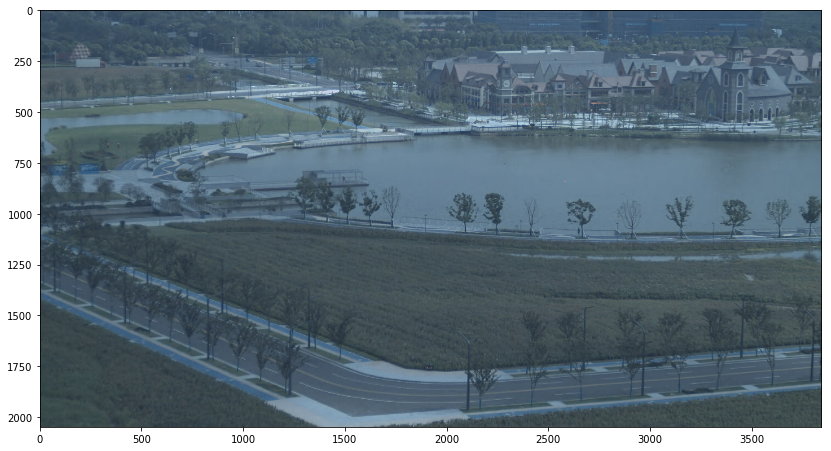

In [14]:
plt.figure(figsize=(14, 18))
plt.imshow(xjp)

Writing: ./4_JP2K_orig_192.png


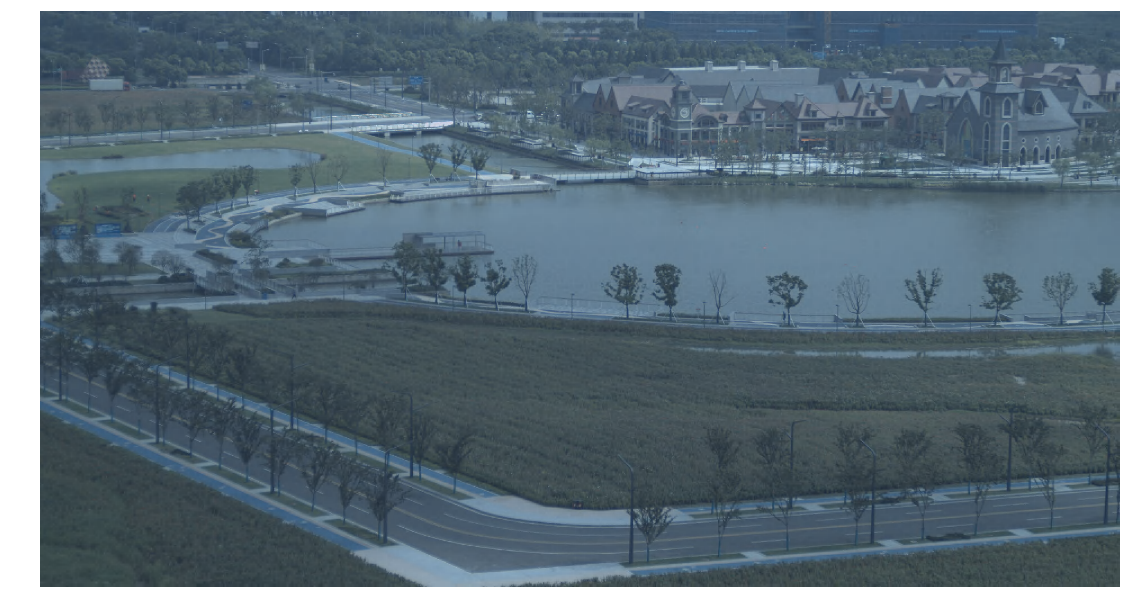

In [15]:
oname= pre_o + 'JP2K_orig_192.png'
save_figure_dpi(xjp, oname, Dpi, Wid, Hig)

In [16]:
output=(xjp*255).astype('uint8')
label=(image_orig*255).astype('uint8')
psnr =compare_psnr(output, label)
ssim =compare_ssim(output, label, multichannel=True)

print("psnr= " + str(psnr))
print("ssim= " + str(ssim))

psnr= 37.53143104925759
ssim= 0.9168861095918185


In [17]:
xjp,size=trans_JP2k(image_orig,768)

/anaconda3/envs/XY-DL/lib/python3.6/site-packages/glymur/jp2k.py:1917: UserWarning: OpenJPEG library warning:  tcp_rates[2]=767.999878 should be strictly lesser than tcp_rates[1]=767.999878
  warnings.warn(msg, UserWarning)


In [18]:
print("xjp shape= " + str(xjp.shape) + " , max= " + str(np.max(xjp)) 
      + " , min= " + str(np.min(xjp)) + " , mean= " + str(np.mean(xjp)))
print("size= " + str(size))
print("ratio= " + str(2048*3840*3/size))

xjp shape= (2048, 3840, 3) , max= 0.9843137 , min= 0.06666667 , mean= 0.36883926
size= 30771
ratio= 766.7271131909915


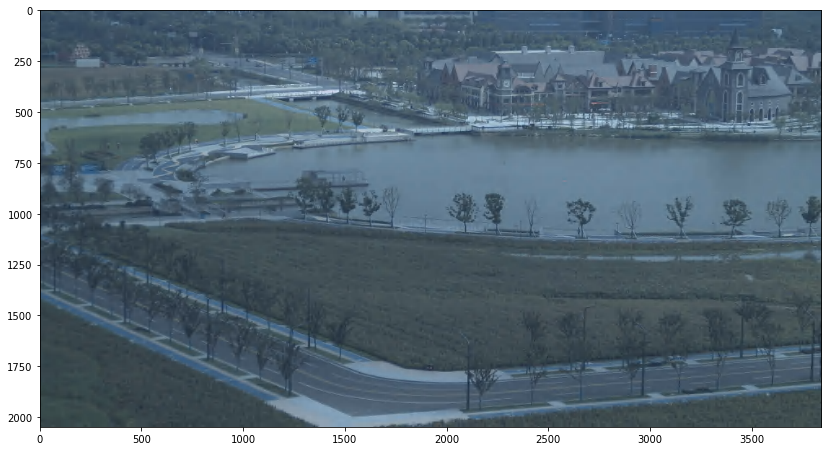

In [19]:
plt.figure(figsize=(14, 18))
plt.imshow(xjp)

Writing: ./4_JP2K_orig_768.png


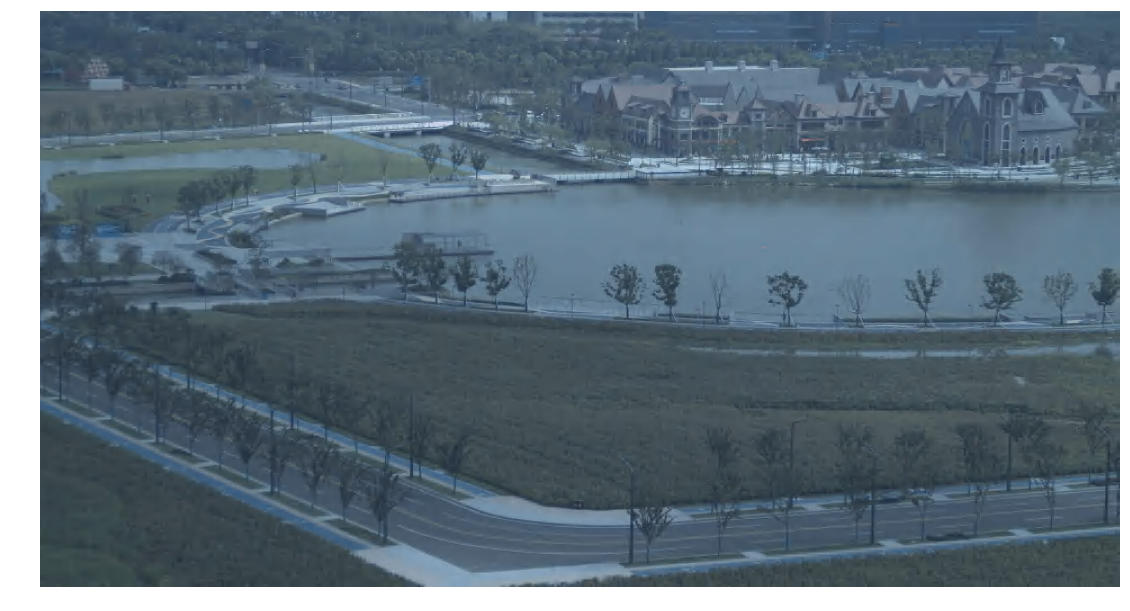

In [20]:
oname= pre_o + 'JP2K_orig_768.png'
save_figure_dpi(xjp, oname, Dpi, Wid, Hig)

In [21]:
output=(xjp*255).astype('uint8')
label=(image_orig*255).astype('uint8')
psnr =compare_psnr(output, label)
ssim =compare_ssim(output, label, multichannel=True)

print("psnr= " + str(psnr))
print("ssim= " + str(ssim))

psnr= 34.341371036361885
ssim= 0.8730146737516993


In [22]:
xjp,size=trans_JP2k(image_orig,102)
print("xjp shape= " + str(xjp.shape) + " , max= " + str(np.max(xjp)) 
      + " , min= " + str(np.min(xjp)) + " , mean= " + str(np.mean(xjp)))
print("size= " + str(size))
print("ratio= " + str(2048*3840*3/size))

xjp shape= (2048, 3840, 3) , max= 0.9529412 , min= 0.105882354 , mean= 0.3678719
size= 231265
ratio= 102.01699349231401


Writing: ./4_JP2K_orig_102.png


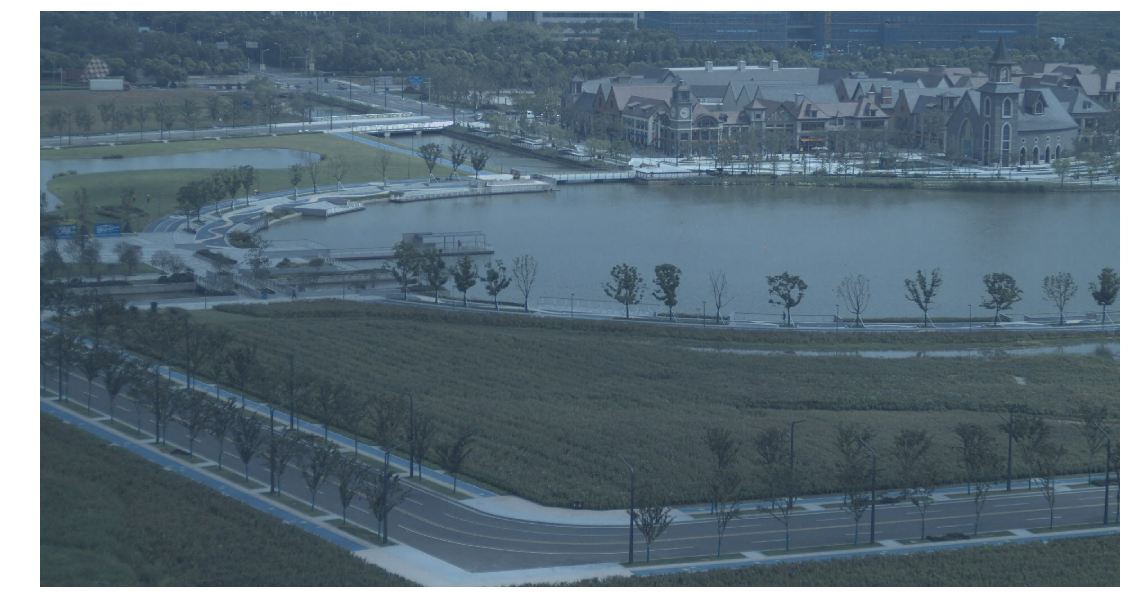

In [23]:
oname= pre_o + 'JP2K_orig_102.png'
save_figure_dpi(xjp, oname, Dpi, Wid, Hig)

In [24]:
output=(xjp*255).astype('uint8')
label=(image_orig*255).astype('uint8')
psnr =compare_psnr(output, label)
ssim =compare_ssim(output, label, multichannel=True)

print("psnr= " + str(psnr))
print("ssim= " + str(ssim))

psnr= 39.072356328342075
ssim= 0.9349442254636062


In [25]:
xjp,size=trans_JP2k(image_orig,363)
print("xjp shape= " + str(xjp.shape) + " , max= " + str(np.max(xjp)) 
      + " , min= " + str(np.min(xjp)) + " , mean= " + str(np.mean(xjp)))
print("size= " + str(size))
print("ratio= " + str(2048*3840*3/size))

xjp shape= (2048, 3840, 3) , max= 0.9647059 , min= 0.09803922 , mean= 0.3692407
size= 64869
ratio= 363.70161402210607


Writing: ./4_JP2K_orig_363.png


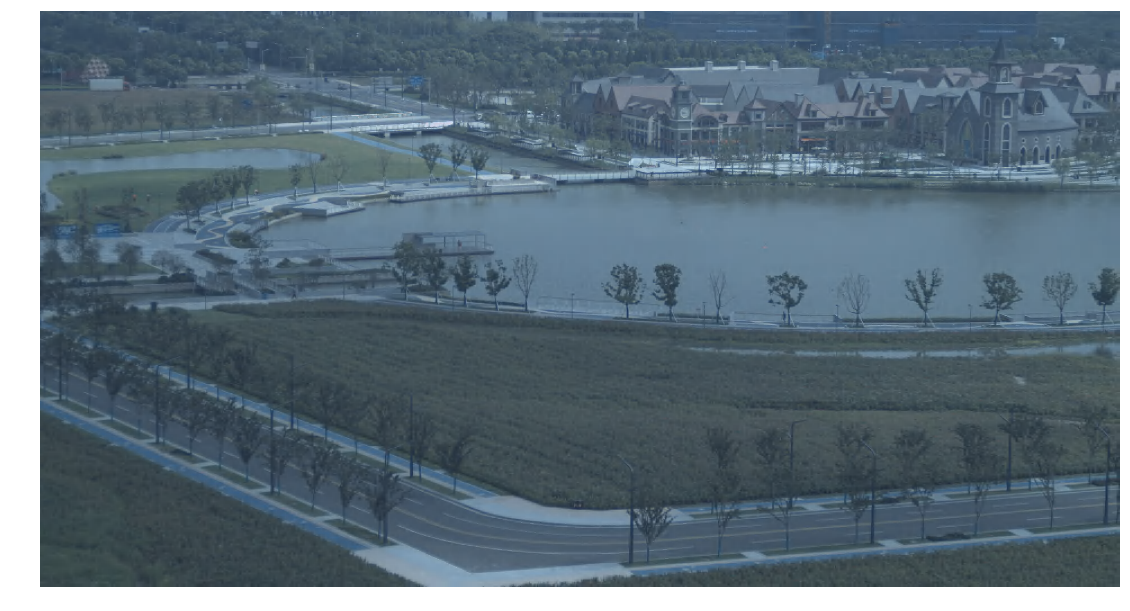

In [26]:
oname= pre_o + 'JP2K_orig_363.png'
save_figure_dpi(xjp, oname, Dpi, Wid, Hig)

In [27]:
output=(xjp*255).astype('uint8')
label=(image_orig*255).astype('uint8')
psnr =compare_psnr(output, label)
ssim =compare_ssim(output, label, multichannel=True)

print("psnr= " + str(psnr))
print("ssim= " + str(ssim))

psnr= 36.03586089683833
ssim= 0.8983179217508458


In [33]:
xjp,size=trans_JP2k(image_orig,1579)
print("xjp shape= " + str(xjp.shape) + " , max= " + str(np.max(xjp)) 
      + " , min= " + str(np.min(xjp)) + " , mean= " + str(np.mean(xjp)))
print("size= " + str(size))
print("ratio= " + str(2048*3840*3/size))

/anaconda3/envs/XY-DL/lib/python3.6/site-packages/glymur/jp2k.py:1917: UserWarning: OpenJPEG library warning:  tcp_rates[2]=1578.999878 should be strictly lesser than tcp_rates[1]=1578.999878
  warnings.warn(msg, UserWarning)


xjp shape= (2048, 3840, 3) , max= 1.0 , min= 0.07058824 , mean= 0.37038726
size= 14989
ratio= 1574.018280072053


Writing: ./4_JP2K_orig_1574.png


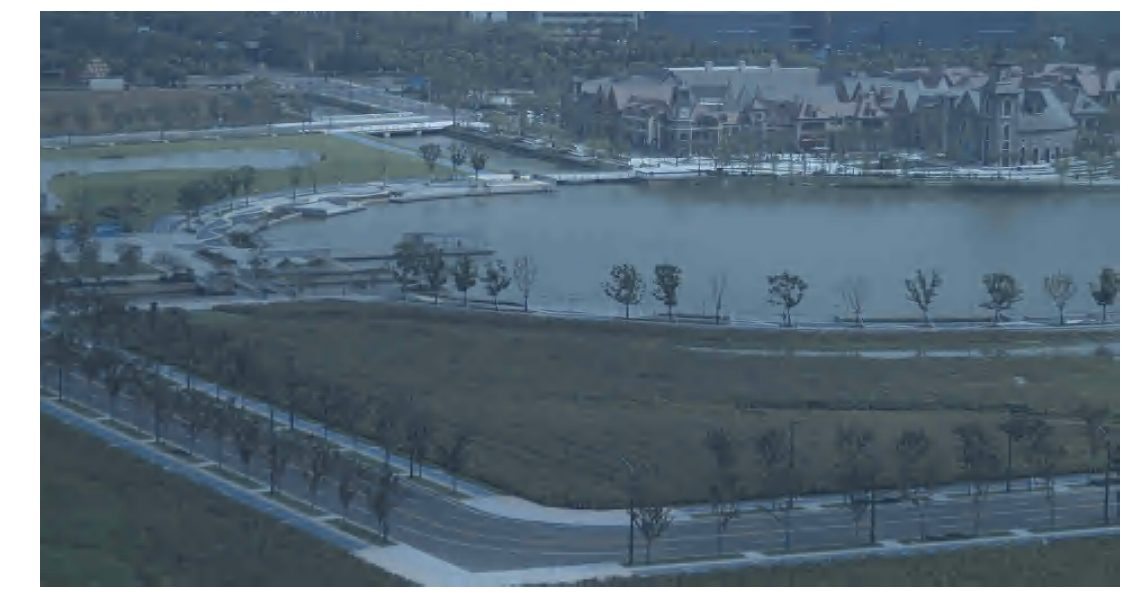

In [34]:
oname= pre_o + 'JP2K_orig_1574.png'
save_figure_dpi(xjp, oname, Dpi, Wid, Hig)

In [35]:
output=(xjp*255).astype('uint8')
label=(image_orig*255).astype('uint8')
psnr =compare_psnr(output, label)
ssim =compare_ssim(output, label, multichannel=True)

print("psnr= " + str(psnr))
print("ssim= " + str(ssim))

psnr= 32.48127918545538
ssim= 0.8476747963205655
